# Variance Trade-Off

- Mengutip dari ISLR

> Variance refers to the amount by which $\hat{f}$ would change if we
estimated it using a different training data set.

Idenya:
- Kita buat data dari distribusi yang sama
- Kita ambil sampel yang berbeda
- Kita modelkan masing-masing sampel
- Dan kita lihat perbedaan $\hat{f}$

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Buat Data

- Data sinusoidal sebagai true function dengan tambahan random sebagai noise

In [37]:
x = np.linspace(1, 10, 51)
y = np.sin(x) + np.random.randn(51) * 0.2

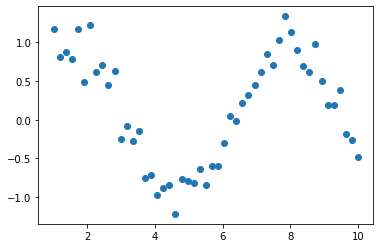

In [39]:
plt.scatter(x, y);

## Buat Data Menjadi Sampel
- Library KFold dari Sklearn akan membantu hal ini

In [40]:
from sklearn.model_selection import KFold

In [41]:
# Split data menjadi 2
kf = KFold(n_splits=2, shuffle=True, random_state=42)
kf.get_n_splits(x)

2

In [42]:
# Tempat penyimpanan
x_fold = []
y_fold = []

# Simpan masing-masing sampel yang telah di split
for i, j in kf.split(x):
    x_fold.append(x[i])
    y_fold.append(y[i])

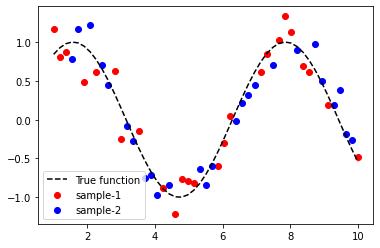

In [43]:
# Hasil
plt.scatter(x_fold[0], y_fold[0], c='red', label='sample-1')
plt.scatter(x_fold[1], y_fold[1], c='blue', label='sample-2')
plt.plot(x, np.sin(x), '--k', label='True function')
plt.legend()
plt.show()

- Sudah terlihat ada 2 sampel (biru dan merah) yang siap kita modelkan
- Dengan true functionnya adalah fungsi sinusoidal -> $y = \sin (x)$

## Pemodelan

- Kita gunakan PolynomialFeatures & LinearRegression untuk memodelkan regresi polinom.
- Bentuknya sebagai berikut:
$$
y = a_{0} + a_{1} x + a_{2} x^2 + \cdots + a_{m} x^{m}
$$

- dengan $m$ adalah ordo (pangkat) tertinggi dari model regresi polinom
- Semakin besar nilai $m$, maka semakin complex / fleksibel modelnya

In [44]:
# Load library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [45]:
# Buat fungsi polinom
def polinom_model(X, y, m):
    # Buat fitur polinom
    poly = PolynomialFeatures(degree=m, include_bias=False)
    poly_features = poly.fit_transform(X.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)

    # Buat prediksi
    x_help = np.linspace(1, 10, 51)
    poly_features_help = poly.fit_transform(x_help.reshape(-1, 1))
    y_pred = poly_reg_model.predict(poly_features_help)

    return y_pred

### Cari model

- Untuk model simpel, misal ordo = 5

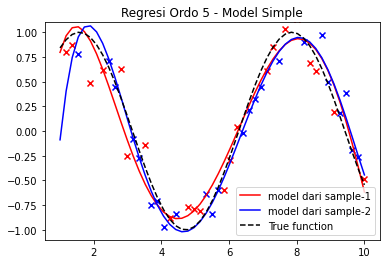

In [65]:
m_simple = 5   # ordo polinom

# Buat model & prediksi
pred_model_sample_1_simpel = polinom_model(X=x_fold[0], y=y_fold[0], m=m_simple)
pred_model_sample_2_simpel = polinom_model(X=x_fold[1], y=y_fold[1], m=m_simple)

# Plot data
plt.plot(x, pred_model_sample_1_simpel, 'red', label='model dari sample-1')
plt.plot(x, pred_model_sample_2_simpel, 'blue', label='model dari sample-2')
plt.scatter(x_fold[0], y_fold[0], c='red', marker='x')
plt.scatter(x_fold[1], y_fold[1], c='blue', marker='x')
plt.plot(x, np.sin(x), '--k', label='True function')
plt.title(f'Regresi Ordo {m_simple} - Model Simple')
plt.ylim(-1.1, 1.1)
plt.legend()
plt.show()

- Untuk model complex, misal ordo = 12

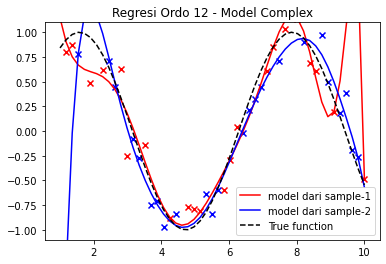

In [66]:
m_complex = 12   # ordo polinom

# Buat model & prediksi
pred_model_sample_1_complex = polinom_model(X=x_fold[0], y=y_fold[0], m=m_complex)
pred_model_sample_2_complex = polinom_model(X=x_fold[1], y=y_fold[1], m=m_complex)

# Plot data
plt.plot(x, pred_model_sample_1_complex, 'red', label='model dari sample-1')
plt.plot(x, pred_model_sample_2_complex, 'blue', label='model dari sample-2')
plt.scatter(x_fold[0], y_fold[0], c='red', marker='x')
plt.scatter(x_fold[1], y_fold[1], c='blue', marker='x')
plt.plot(x, np.sin(x), '--k', label='True function')
plt.title(f'Regresi Ordo {m_complex} - Model Complex')
plt.ylim(-1.1, 1.1)
plt.legend()
plt.show()

- Perbandingan

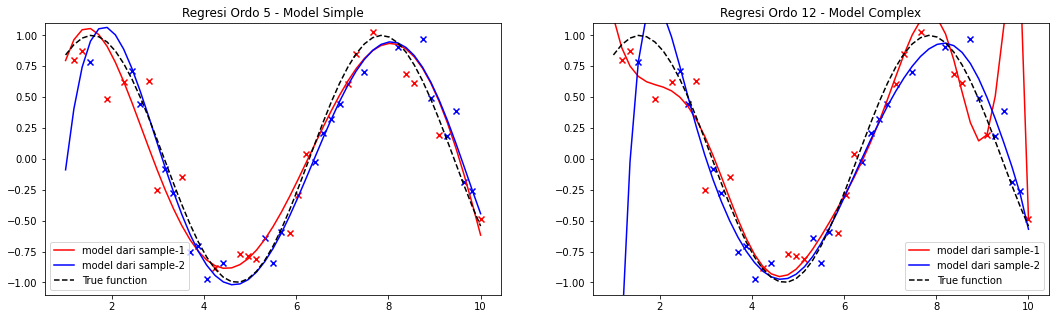

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

# Ordo rendah
ax[0].plot(x, pred_model_sample_1_simpel, 'red', label='model dari sample-1')
ax[0].plot(x, pred_model_sample_2_simpel, 'blue', label='model dari sample-2')
ax[0].scatter(x_fold[0], y_fold[0], c='red', marker='x')
ax[0].scatter(x_fold[1], y_fold[1], c='blue', marker='x')
ax[0].plot(x, np.sin(x), '--k', label='True function')
ax[0].set_title(f'Regresi Ordo {m_simple} - Model Simple')
ax[0].set_ylim(-1.1, 1.1)
ax[0].legend()

# Ordo tinggi
ax[1].plot(x, pred_model_sample_1_complex, 'red', label='model dari sample-1')
ax[1].plot(x, pred_model_sample_2_complex, 'blue', label='model dari sample-2')
ax[1].scatter(x_fold[0], y_fold[0], c='red', marker='x')
ax[1].scatter(x_fold[1], y_fold[1], c='blue', marker='x')
ax[1].plot(x, np.sin(x), '--k', label='True function')
ax[1].set_title(f'Regresi Ordo {m_complex} - Model Complex')
ax[1].set_ylim(-1.1, 1.1)
ax[1].legend()

plt.show()

Terlihat bahwa
- terjadi perubahan drastis pada nilai $\hat{f}$ (model) antara sampel 1 & 2 pada model complex (ordo tinggi - ordo 12), dibanding model dengan ordo kecil (less complex model)
- perubahan drastis ini mengakibatkan variance antar model meningkat
- Hal ini yang ingin dihindari agar model tidak over fitting